### Import Library

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_excel('/content/4 DataCuacaSulsel(BeforePreprocessing).xlsx')
dataset

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,rain
0,01-01-2020,24.8,30.6,27.0,89.0,30.0,8.0,6.0,270.0,3.0,W,3
1,02-01-2020,24.8,28.4,25.2,97.0,15.5,1.2,6.0,240.0,2.0,SE,2
2,03-01-2020,24.2,26.0,25.1,95.0,69.3,0.0,5.0,280.0,1.0,E,4
3,04-01-2020,23.6,30.7,27.2,86.0,32.9,0.0,5.0,310.0,3.0,NW,3
4,05-01-2020,24.3,30.8,26.1,88.0,1.5,3.3,9.0,260.0,3.0,E,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,27-08-2023,23.2,34.2,28.1,70.0,0.0,11.0,5.0,240.0,3.0,E,1
1335,28-08-2023,22.7,34.3,29.4,57.0,0.0,11.1,5.0,70.0,3.0,E,1
1336,29-08-2023,22.1,34.6,28.6,66.0,0.0,11.3,6.0,260.0,3.0,W,1
1337,30-08-2023,24.7,34.9,29.1,62.0,0.0,11.3,5.0,70.0,3.0,E,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      1316 non-null   float64
 1   Tx      1324 non-null   float64
 2   Tavg    1324 non-null   float64
 3   RH_avg  1324 non-null   float64
 4   RR      1210 non-null   float64
 5   ss      1322 non-null   float64
 6   ff_x    1325 non-null   float64
 7   ddd_x   1324 non-null   float64
 8   ff_avg  1325 non-null   float64
 9   rain    1339 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 104.7 KB


In [ ]:
dataset.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,rain
count,1316.000000,1324.000000,1324.000000,1324.000000,1210.000000,1322.000000,1325.00000,1324.000000,1325.000000,1339.000000
mean,24.362690,31.244789,27.221224,83.760574,12.388017,6.030333,4.17434,254.070997,1.701132,1.714712
std,0.958118,1.551459,1.101313,6.885584,26.409522,3.557263,1.31478,77.049754,0.699400,0.942685
min,20.200000,24.800000,23.500000,52.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,23.800000,30.500000,26.600000,80.000000,0.000000,3.125000,3.00000,260.000000,1.000000,1.000000
50%,24.400000,31.400000,27.300000,84.000000,0.900000,6.300000,4.00000,280.000000,2.000000,1.000000
75%,25.000000,32.200000,27.900000,88.000000,12.575000,9.100000,5.00000,300.000000,2.000000,2.000000
max,27.600000,35.600000,31.000000,98.000000,263.000000,14.900000,13.00000,360.000000,5.000000,5.000000


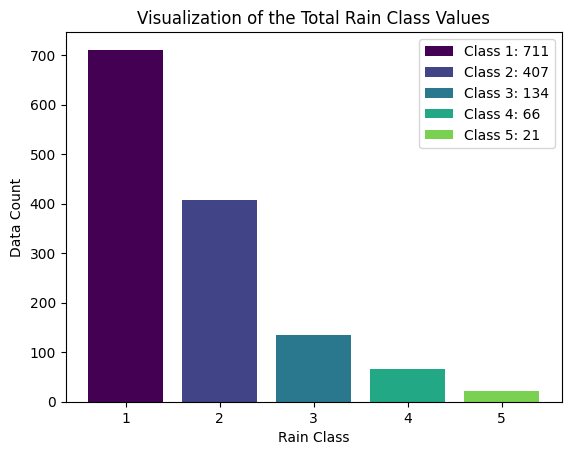

In [ ]:
# Menghitung jumlah setiap nilai dalam kolom 'rain'
value_counts = dataset['rain'].value_counts().sort_index()

# Use the 'viridis' colormap for gradient colors
cmap = plt.get_cmap('viridis')

# Determine the number of gradient colors needed
num_colors = len(value_counts)

# Create a bar chart with gradient colors
for i, (index, count) in enumerate(value_counts.items()):
    color = cmap(i / num_colors)  # Using the colormap to create a gradient color
    plt.bar(index, count, color=color, label=f'Class {index}: {count}')

# Add axis labels and title
plt.xlabel('Rain Class')
plt.ylabel('Data Count')
plt.title('Visualization of the Total Rain Class Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
dataset = dataset[['Tn','Tx','Tavg','RH_avg','RR','ss','ff_x','ddd_x','ff_avg','rain']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      1316 non-null   float64
 1   Tx      1324 non-null   float64
 2   Tavg    1324 non-null   float64
 3   RH_avg  1324 non-null   float64
 4   RR      1210 non-null   float64
 5   ss      1322 non-null   float64
 6   ff_x    1325 non-null   float64
 7   ddd_x   1324 non-null   float64
 8   ff_avg  1325 non-null   float64
 9   rain    1339 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 104.7 KB


In [ ]:
dataset.isnull().sum()

Tn         23
Tx         15
Tavg       15
RH_avg     15
RR        129
ss         17
ff_x       14
ddd_x      15
ff_avg     14
rain        0
dtype: int64

In [ ]:
dfdrop = dataset.dropna()
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1338
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      1196 non-null   float64
 1   Tx      1196 non-null   float64
 2   Tavg    1196 non-null   float64
 3   RH_avg  1196 non-null   float64
 4   RR      1196 non-null   float64
 5   ss      1196 non-null   float64
 6   ff_x    1196 non-null   float64
 7   ddd_x   1196 non-null   float64
 8   ff_avg  1196 non-null   float64
 9   rain    1196 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 102.8 KB


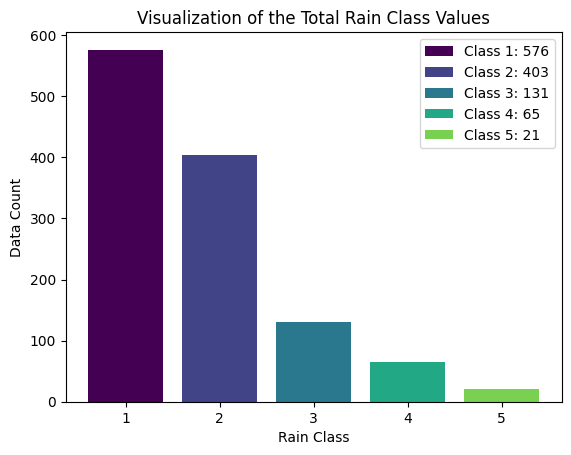

In [ ]:
# Menghitung jumlah setiap nilai dalam kolom 'rain'
value_counts = dfdrop['rain'].value_counts().sort_index()

# Use the 'viridis' colormap for gradient colors
cmap = plt.get_cmap('viridis')

# Determine the number of gradient colors needed
num_colors = len(value_counts)

# Create a bar chart with gradient colors
for i, (index, count) in enumerate(value_counts.items()):
    color = cmap(i / num_colors)  # Using the colormap to create a gradient color
    plt.bar(index, count, color=color, label=f'Class {index}: {count}')

# Add axis labels and title
plt.xlabel('Rain Class')
plt.ylabel('Data Count')
plt.title('Visualization of the Total Rain Class Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Fill NaN with 0
data = dataset.copy()
for col in dataset.columns:
    data[col].fillna(0, inplace=True)

# Save the dataset
data.to_csv("DataCuacaSulSel(AfterPreprocessing).csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      1339 non-null   float64
 1   Tx      1339 non-null   float64
 2   Tavg    1339 non-null   float64
 3   RH_avg  1339 non-null   float64
 4   RR      1339 non-null   float64
 5   ss      1339 non-null   float64
 6   ff_x    1339 non-null   float64
 7   ddd_x   1339 non-null   float64
 8   ff_avg  1339 non-null   float64
 9   rain    1339 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 104.7 KB


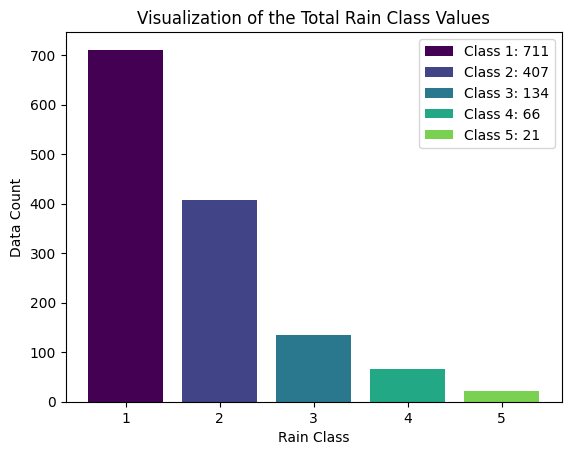

In [ ]:
# Menghitung jumlah setiap nilai dalam kolom 'rain'
value_counts = data['rain'].value_counts().sort_index()

# Use the 'viridis' colormap for gradient colors
cmap = plt.get_cmap('viridis')

# Determine the number of gradient colors needed
num_colors = len(value_counts)

# Create a bar chart with gradient colors
for i, (index, count) in enumerate(value_counts.items()):
    color = cmap(i / num_colors)  # Using the colormap to create a gradient color
    plt.bar(index, count, color=color, label=f'Class {index}: {count}')

# Add axis labels and title
plt.xlabel('Rain Class')
plt.ylabel('Data Count')
plt.title('Visualization of the Total Rain Class Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = data.drop('rain', axis=1)
Y = data['rain']

# Inisialisasi StandardScaler dan terapkan pada data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi model Logistic Regression dengan max_iter=1000
model = LogisticRegression(max_iter=1000)

# Inisialisasi RFE dan tentukan jumlah fitur yang akan dipilih
rfe = RFE(model, n_features_to_select=3)

# Fit RFE pada data yang telah discaling
rfe.fit(X_scaled, Y)

# Tampilkan fitur yang terpilih
print("Fitur terpilih:", list(X.columns[rfe.support_]))

# Tampilkan ranking fitur
print("Ranking fitur:", rfe.ranking_)

Fitur terpilih: ['Tavg', 'RH_avg', 'RR']
Ranking fitur: [7 2 1 1 1 4 6 3 5]


In [ ]:
#xx = dfdrop[['Tavg','RH_avg','ff_avg','RR']]
#yy = dfdrop['rain'].values
#xdrop = dfdrop[['Tavg', 'RH_avg', 'RR', 'ddd_x']]
#ydrop = dfdrop['rain'].values

xx = dfdrop[['Tavg', 'RH_avg', 'RR']]
yy = dfdrop['rain'].values
xdrop = dfdrop[['Tavg', 'RH_avg', 'RR']]
ydrop = dfdrop['rain'].values

In [ ]:
#xxx = data[['Tavg','RH_avg','ff_avg','RR']]
#yyy = data['rain'].values
#xdata = data[['Tavg', 'RH_avg', 'RR', 'ddd_x']]
#ydata = data['rain'].values

xxx = data[['Tavg', 'RH_avg', 'RR']]
yyy = data['rain'].values
xdata = data[['Tavg', 'RH_avg', 'RR']]
ydata = data['rain'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2, random_state=123456)

### KNN - Non PCA - Non Scaler - Data Dropping

The optimal K value is 6
The elbow accuracy is 0.9666666666666667
Minimum accuracy: 0.8791666666666667 at K = 48
Maximum accuracy: 0.9875 at K = 1


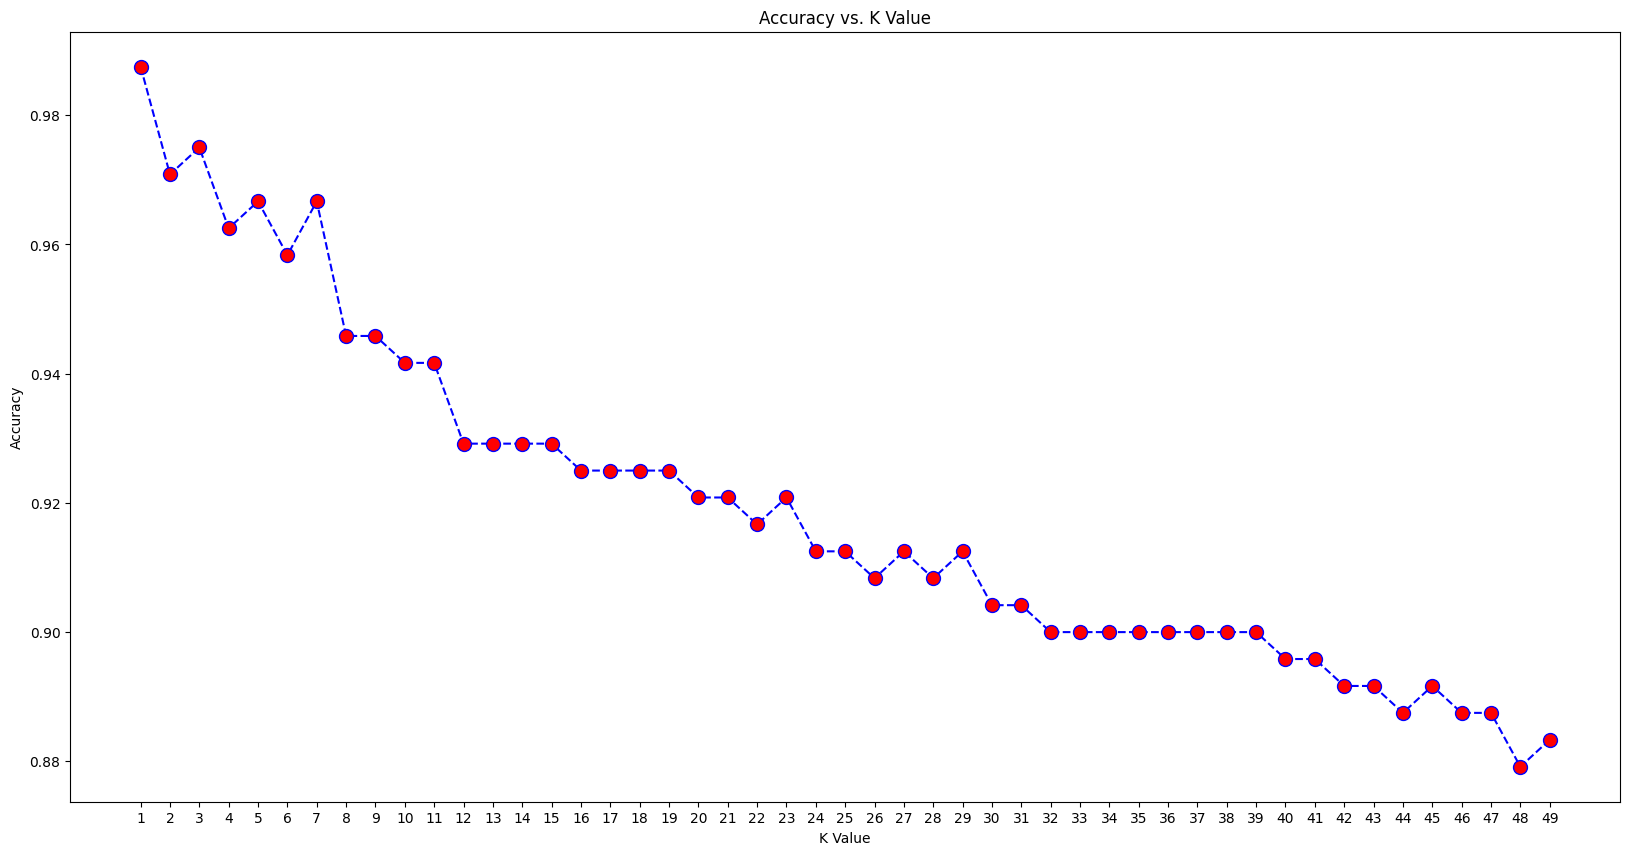

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# List to store accuracy values
acc = []

# Loop through different values of K
for i in range(1, 50):
    # Create KNN classifier with K = i
    neigh = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)

    # Predict the response for test dataset
    yhat = neigh.predict(x_test)

    # Calculate accuracy and append to list
    acc.append(accuracy_score(y_test, yhat))

# Find the elbow point
elbow = np.argmax(np.diff(acc)) + 1

# Print the optimal K value and elbow K
print("The optimal K value is", elbow)
# Print the elbow accuracy
print("The elbow accuracy is", acc[elbow])

# Create plot
plt.figure(figsize=(20, 10))
plt.plot(range(1, 50), acc, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")

# Set x-axis labels to K values
plt.xticks(range(1, 50), [str(i) for i in range(1, 50)])

# Print minimum and maximum accuracy with corresponding K values
print("Minimum accuracy:", min(acc), "at K =", acc.index(min(acc)) + 1)
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)) + 1)

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Create KNN classifier with K = 4
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96       122
           2       1.00      0.86      0.92        69
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         6

    accuracy                           0.96       240
   macro avg       0.98      0.97      0.98       240
weighted avg       0.96      0.96      0.96       240



### KNN - PCA - Non Scaler - Data Dropping

The optimal K value is 48
The elbow accuracy is 0.8916666666666667
Minimum accuracy: 0.8875 at K = 48
Maximum accuracy: 0.9875 at K = 1


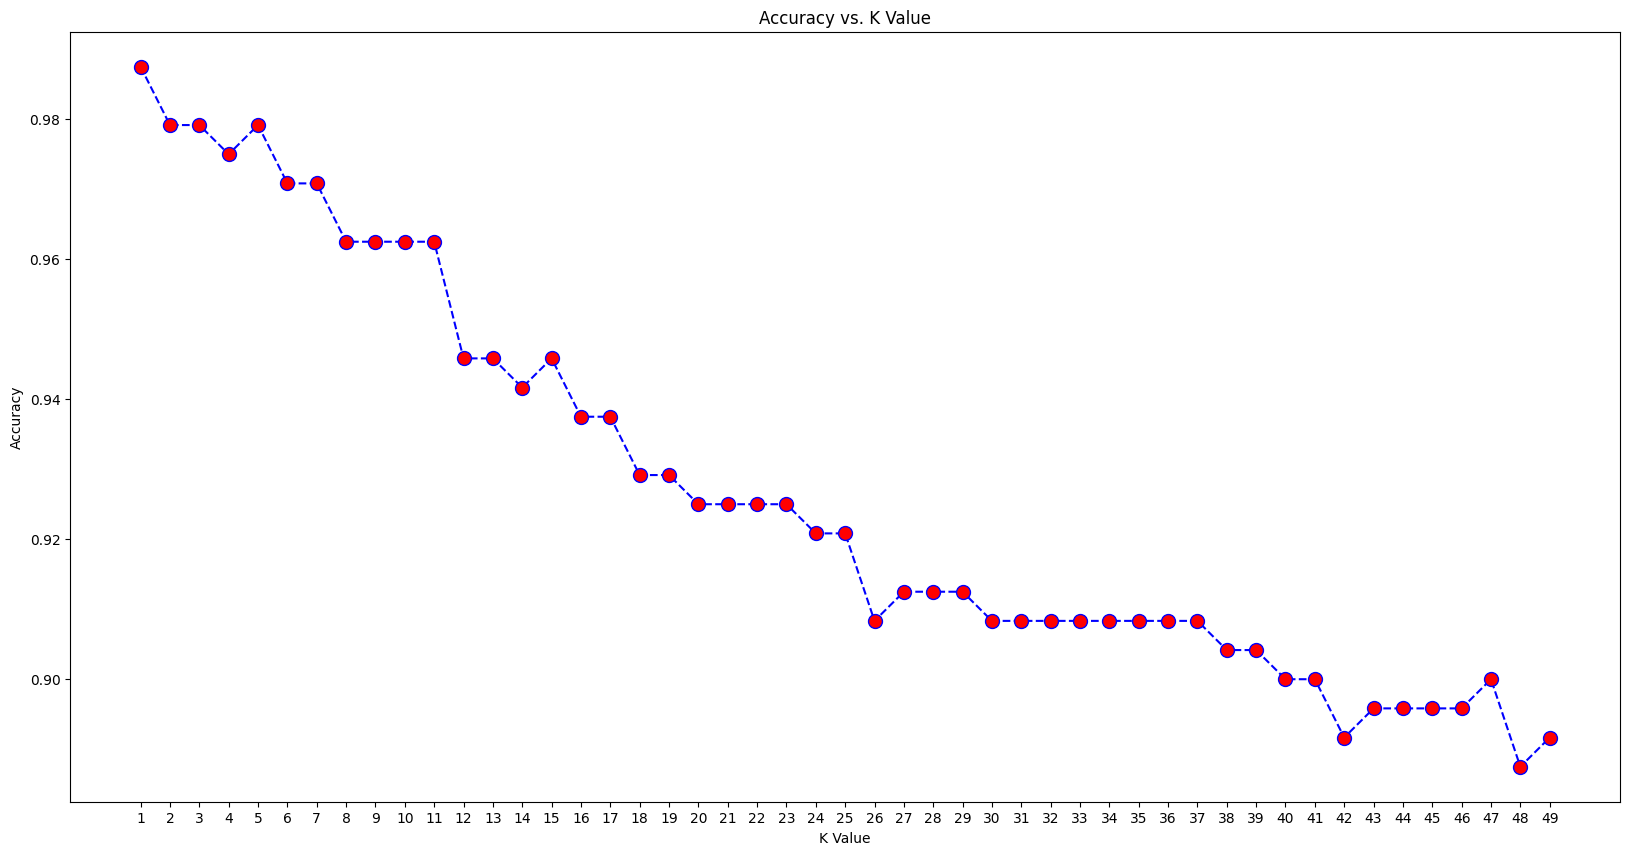

In [ ]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# List to store accuracy values
acc = []

# Loop through different values of K
for i in range(1, 50):
    # Create KNN classifier with K = i
    neigh = KNeighborsClassifier(n_neighbors=i).fit(x_train_pca, y_train)

    # Predict the response for test dataset
    yhat = neigh.predict(x_test_pca)

    # Calculate accuracy and append to list
    acc.append(accuracy_score(y_test, yhat))

# Find the elbow point
elbow = np.argmax(np.diff(acc)) + 1

# Print the optimal K value and elbow K
print("The optimal K value is", elbow)
# Print the elbow accuracy
print("The elbow accuracy is", acc[elbow])

# Create plot
plt.figure(figsize=(20, 10))
plt.plot(range(1, 50), acc, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")

# Set x-axis labels to K values
plt.xticks(range(1, 50), [str(i) for i in range(1, 50)])

# Print minimum and maximum accuracy with corresponding K values
print("Minimum accuracy:", min(acc), "at K =", acc.index(min(acc)) + 1)
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)) + 1)

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
# Perform PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Create KNN classifier with K = 10
knn = KNeighborsClassifier(n_neighbors=48)

# Fit the model
knn.fit(x_train_pca, y_train)

# Predict the response for test dataset
y_pred = knn.predict(x_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93       122
           2       0.93      0.75      0.83        69
           3       1.00      0.87      0.93        30
           4       0.68      1.00      0.81        13
           5       0.00      0.00      0.00         6

    accuracy                           0.89       240
   macro avg       0.70      0.72      0.70       240
weighted avg       0.88      0.89      0.87       240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xxx, yyy, test_size = 0.2, random_state=123456)

The optimal K value is 4
The elbow accuracy is 0.9776119402985075
Minimum accuracy: 0.8768656716417911 at K = 46
Maximum accuracy: 0.9925373134328358 at K = 1


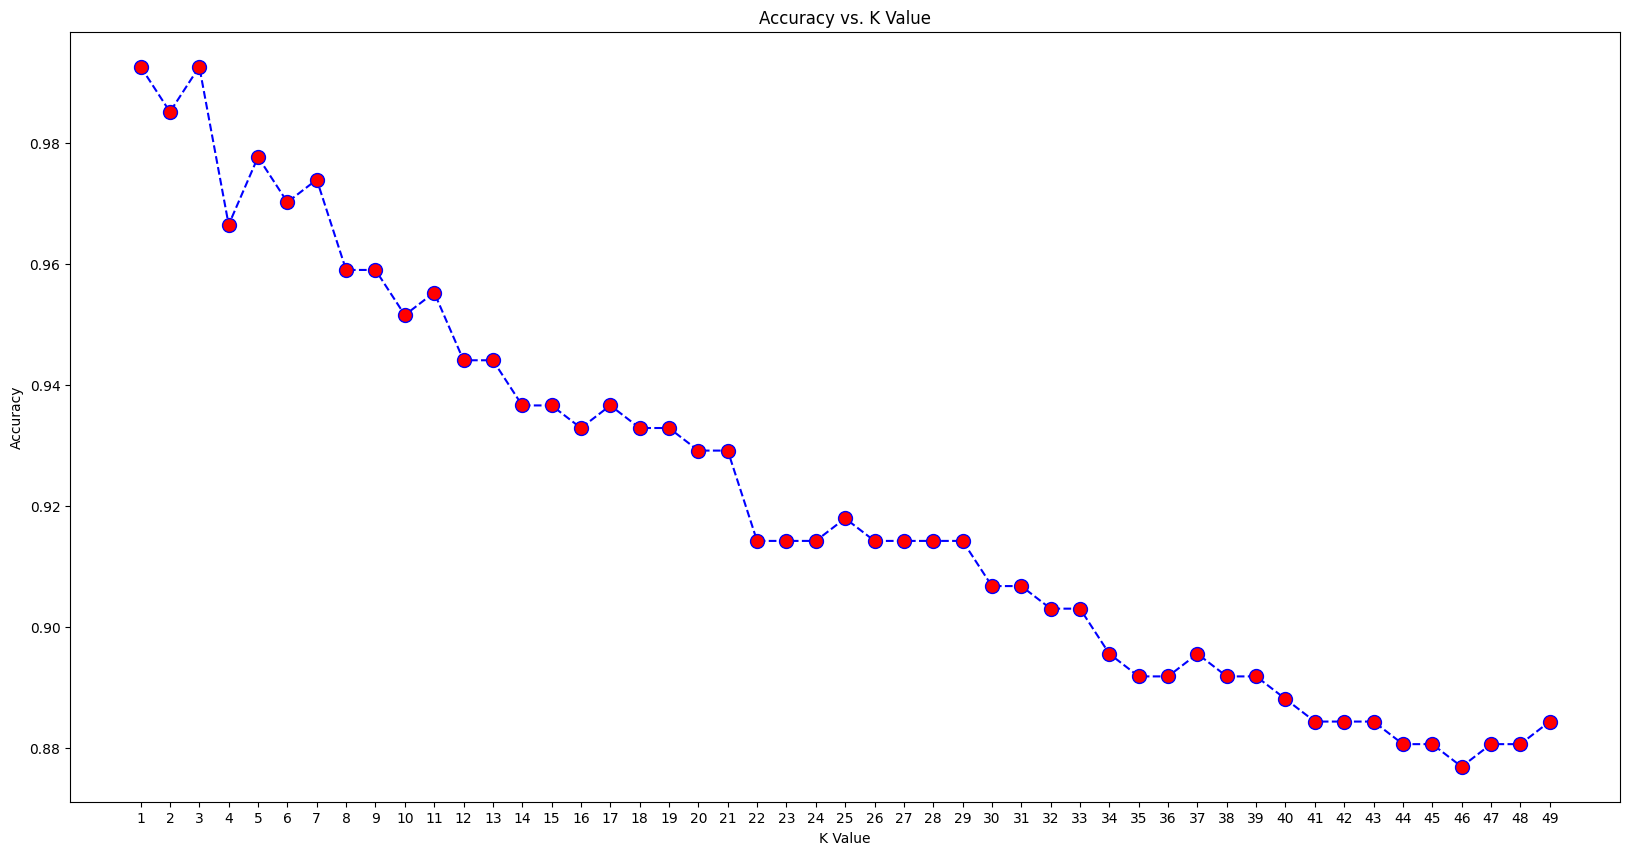

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# List to store accuracy values
acc = []

# Loop through different values of K
for i in range(1, 50):
    # Create KNN classifier with K = i
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train_pca, Y_train)

    # Predict the response for test dataset
    Yhat = neigh.predict(X_test_pca)

    # Calculate accuracy and append to list
    acc.append(accuracy_score(Y_test, Yhat))

# Find the elbow point
elbow = np.argmax(np.diff(acc)) + 1

# Print the optimal K value and elbow K
print("The optimal K value is", elbow)
# Print the elbow accuracy
print("The elbow accuracy is", acc[elbow])

# Create plot
plt.figure(figsize=(20, 10))
plt.plot(range(1, 50), acc, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")

# Set x-axis labels to K values
plt.xticks(range(1, 50), [str(i) for i in range(1, 50)])

# Print minimum and maximum accuracy with corresponding K values
print("Minimum accuracy:", min(acc), "at K =", acc.index(min(acc)) + 1)
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)) + 1)

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Create KNN classifier with K = 22
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the model
knn.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = knn.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96       146
           2       1.00      0.84      0.92        83
           3       0.96      1.00      0.98        25
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         4

    accuracy                           0.95       268
   macro avg       0.98      0.97      0.97       268
weighted avg       0.96      0.95      0.95       268



The optimal K value is 2
The elbow accuracy is 0.9626865671641791
Minimum accuracy: 0.8768656716417911 at K = 42
Maximum accuracy: 0.9626865671641791 at K = 3


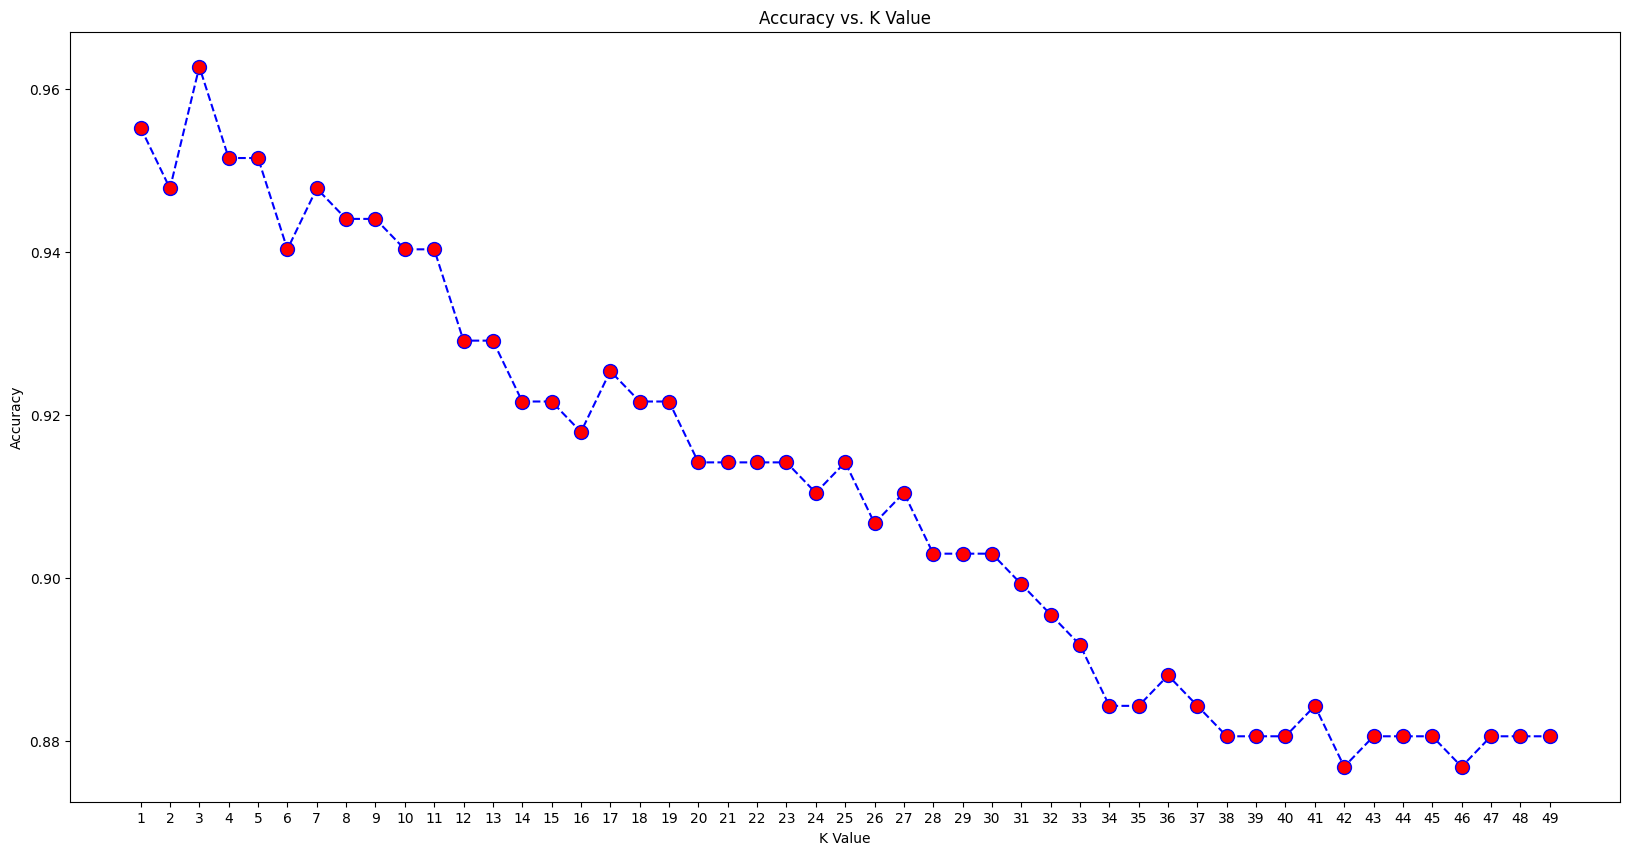

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# List to store accuracy values
acc = []

# Loop through different values of K
for i in range(1, 50):
    # Create KNN classifier with K = i
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)

    # Predict the response for test dataset
    Yhat = neigh.predict(X_test)

    # Calculate accuracy and append to list
    acc.append(accuracy_score(Y_test, Yhat))

# Find the elbow point
elbow = np.argmax(np.diff(acc)) + 1

# Print the optimal K value and elbow K
print("The optimal K value is", elbow)
# Print the elbow accuracy
print("The elbow accuracy is", acc[elbow])

# Create plot
plt.figure(figsize=(20, 10))
plt.plot(range(1, 50), acc, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")

# Set x-axis labels to K values
plt.xticks(range(1, 50), [str(i) for i in range(1, 50)])

# Print minimum and maximum accuracy with corresponding K values
print("Minimum accuracy:", min(acc), "at K =", acc.index(min(acc)) + 1)
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)) + 1)

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create KNN classifier with K = 8
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the model
knn.fit(X_train_pca, Y_train)

# Predict the response for test dataset
Y_pred = knn.predict(X_test_pca)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99       146
           2       1.00      0.95      0.98        83
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         4

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.98       268

